###             DS MINOR PROJECT

### Problem statement: Create a classification model to predict the gender (male or female) based on different acoustic parameters

In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [102]:
df = pd.read_csv('voice.csv')
df.head(3168)

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3163,0.131884,0.084734,0.153707,0.049285,0.201144,0.151859,1.762129,6.630383,0.962934,0.763182,...,0.131884,0.182790,0.083770,0.262295,0.832899,0.007812,4.210938,4.203125,0.161929,female
3164,0.116221,0.089221,0.076758,0.042718,0.204911,0.162193,0.693730,2.503954,0.960716,0.709570,...,0.116221,0.188980,0.034409,0.275862,0.909856,0.039062,3.679688,3.640625,0.277897,female
3165,0.142056,0.095798,0.183731,0.033424,0.224360,0.190936,1.876502,6.604509,0.946854,0.654196,...,0.142056,0.209918,0.039506,0.275862,0.494271,0.007812,2.937500,2.929688,0.194759,female
3166,0.143659,0.090628,0.184976,0.043508,0.219943,0.176435,1.591065,5.388298,0.950436,0.675470,...,0.143659,0.172375,0.034483,0.250000,0.791360,0.007812,3.593750,3.585938,0.311002,female


In [103]:
df.isnull().sum()

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64

In [104]:
df.isnull()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3163,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3164,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3165,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3166,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [105]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
3163    False
3164    False
3165    False
3166    False
3167    False
Length: 3168, dtype: bool

### no NULL values to be handled or removed

In [106]:
df['label'].value_counts()

male      1584
female    1584
Name: label, dtype: int64

([<matplotlib.patches.Wedge at 0x22f025eac10>,
 [Text(6.735557395310444e-17, 1.1, 'male'),
  Text(-2.0206672185931328e-16, -1.1, 'female')])

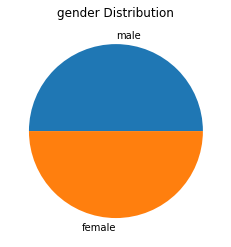

In [107]:
label=df.label.value_counts().index
count=df.label.value_counts().values
plt.title('gender Distribution')
plt.pie(count,labels=label)

In [108]:
df.dtypes

meanfreq    float64
sd          float64
median      float64
Q25         float64
Q75         float64
IQR         float64
skew        float64
kurt        float64
sp.ent      float64
sfm         float64
mode        float64
centroid    float64
meanfun     float64
minfun      float64
maxfun      float64
meandom     float64
mindom      float64
maxdom      float64
dfrange     float64
modindx     float64
label        object
dtype: object

In [109]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]
print(type(x))
print(type(y))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [110]:
print(x.shape)
print(y.shape)

(3168, 20)
(3168,)


In [111]:
x.head(3168)

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,0.000000,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,0.000000,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,0.000000,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,0.083878,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,0.104261,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3163,0.131884,0.084734,0.153707,0.049285,0.201144,0.151859,1.762129,6.630383,0.962934,0.763182,0.200836,0.131884,0.182790,0.083770,0.262295,0.832899,0.007812,4.210938,4.203125,0.161929
3164,0.116221,0.089221,0.076758,0.042718,0.204911,0.162193,0.693730,2.503954,0.960716,0.709570,0.013683,0.116221,0.188980,0.034409,0.275862,0.909856,0.039062,3.679688,3.640625,0.277897
3165,0.142056,0.095798,0.183731,0.033424,0.224360,0.190936,1.876502,6.604509,0.946854,0.654196,0.008006,0.142056,0.209918,0.039506,0.275862,0.494271,0.007812,2.937500,2.929688,0.194759
3166,0.143659,0.090628,0.184976,0.043508,0.219943,0.176435,1.591065,5.388298,0.950436,0.675470,0.212202,0.143659,0.172375,0.034483,0.250000,0.791360,0.007812,3.593750,3.585938,0.311002


In [112]:
y.head(3168)

0         male
1         male
2         male
3         male
4         male
         ...  
3163    female
3164    female
3165    female
3166    female
3167    female
Name: label, Length: 3168, dtype: object

In [113]:
from sklearn.model_selection import train_test_split

In [114]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(2534, 20)
(634, 20)
(2534,)
(634,)


### Applying Decision Tree Classifier

In [115]:
from sklearn.tree import DecisionTreeClassifier

In [116]:
m1 = DecisionTreeClassifier(criterion = 'gini',max_depth=20,min_samples_split = 2534)
m1.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=20, min_samples_split=2534)

In [117]:
print('training score',m1.score(x_train,y_train))
print('testing score',m1.score(x_test,y_test))
#accuracy value

training score 0.9558011049723757
testing score 0.9495268138801262


In [118]:
ypred_m1 = m1.predict(x_test)
print(ypred_m1)

['male' 'female' 'female' 'female' 'female' 'female' 'male' 'female'
 'male' 'male' 'female' 'female' 'male' 'male' 'female' 'female' 'male'
 'male' 'male' 'male' 'female' 'male' 'female' 'female' 'male' 'female'
 'male' 'female' 'male' 'male' 'female' 'female' 'male' 'female' 'female'
 'female' 'male' 'male' 'male' 'male' 'male' 'female' 'male' 'female'
 'female' 'female' 'female' 'male' 'female' 'male' 'female' 'female'
 'female' 'female' 'female' 'female' 'male' 'female' 'male' 'male'
 'female' 'female' 'male' 'male' 'male' 'male' 'male' 'female' 'female'
 'female' 'female' 'female' 'male' 'female' 'male' 'female' 'male'
 'female' 'male' 'male' 'female' 'male' 'male' 'female' 'male' 'female'
 'female' 'female' 'female' 'female' 'female' 'female' 'male' 'female'
 'female' 'male' 'male' 'male' 'female' 'male' 'male' 'male' 'male' 'male'
 'male' 'female' 'female' 'male' 'male' 'female' 'male' 'female' 'female'
 'female' 'male' 'female' 'male' 'female' 'male' 'female' 'female'
 'female'

In [119]:
from sklearn.metrics import confusion_matrix,classification_report

In [120]:
cm_m1 = confusion_matrix(y_test,ypred_m1)
print(cm_m1)
print(classification_report(y_test,ypred_m1))

[[297  17]
 [ 15 305]]
              precision    recall  f1-score   support

      female       0.95      0.95      0.95       314
        male       0.95      0.95      0.95       320

    accuracy                           0.95       634
   macro avg       0.95      0.95      0.95       634
weighted avg       0.95      0.95      0.95       634



### Applying Random Forest Classifier

In [121]:
from sklearn.ensemble import RandomForestClassifier

In [122]:
m2 = RandomForestClassifier(n_estimators = 150, criterion = 'entropy',max_depth=20,min_samples_split = 2534)
m2.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=20,
                       min_samples_split=2534, n_estimators=150)

In [123]:
print('training score',m2.score(x_train,y_train))
print('testing score',m2.score(x_test,y_test))

training score 0.5011838989739542
testing score 0.4952681388012618


In [124]:
ypred_m2 = m1.predict(x_test)
print(ypred_m2)

['male' 'female' 'female' 'female' 'female' 'female' 'male' 'female'
 'male' 'male' 'female' 'female' 'male' 'male' 'female' 'female' 'male'
 'male' 'male' 'male' 'female' 'male' 'female' 'female' 'male' 'female'
 'male' 'female' 'male' 'male' 'female' 'female' 'male' 'female' 'female'
 'female' 'male' 'male' 'male' 'male' 'male' 'female' 'male' 'female'
 'female' 'female' 'female' 'male' 'female' 'male' 'female' 'female'
 'female' 'female' 'female' 'female' 'male' 'female' 'male' 'male'
 'female' 'female' 'male' 'male' 'male' 'male' 'male' 'female' 'female'
 'female' 'female' 'female' 'male' 'female' 'male' 'female' 'male'
 'female' 'male' 'male' 'female' 'male' 'male' 'female' 'male' 'female'
 'female' 'female' 'female' 'female' 'female' 'female' 'male' 'female'
 'female' 'male' 'male' 'male' 'female' 'male' 'male' 'male' 'male' 'male'
 'male' 'female' 'female' 'male' 'male' 'female' 'male' 'female' 'female'
 'female' 'male' 'female' 'male' 'female' 'male' 'female' 'female'
 'female'

In [125]:
cm_m2 = confusion_matrix(y_test,ypred_m2)
print(cm_m2)
print(classification_report(y_test,ypred_m2))

[[297  17]
 [ 15 305]]
              precision    recall  f1-score   support

      female       0.95      0.95      0.95       314
        male       0.95      0.95      0.95       320

    accuracy                           0.95       634
   macro avg       0.95      0.95      0.95       634
weighted avg       0.95      0.95      0.95       634



### Applying KNN Classifier

In [126]:
from sklearn.neighbors import KNeighborsClassifier

In [127]:
m3 = KNeighborsClassifier(n_neighbors=20)
m3.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=20)

In [128]:
print('training score',m3.score(x_train,y_train))
print('testing score',m3.score(x_test,y_test))

training score 0.734017363851618
testing score 0.6782334384858044


In [129]:
ypred_m3 = m3.predict(x_test)
print(ypred_m3)

['male' 'female' 'female' 'male' 'female' 'female' 'male' 'female' 'male'
 'female' 'female' 'female' 'male' 'male' 'female' 'male' 'male' 'female'
 'male' 'female' 'female' 'male' 'female' 'male' 'female' 'male' 'male'
 'male' 'male' 'female' 'male' 'female' 'male' 'male' 'female' 'female'
 'female' 'female' 'male' 'male' 'male' 'female' 'female' 'female' 'male'
 'male' 'female' 'male' 'male' 'male' 'female' 'male' 'male' 'female'
 'female' 'male' 'male' 'male' 'male' 'male' 'female' 'female' 'male'
 'male' 'male' 'male' 'female' 'female' 'male' 'female' 'female' 'female'
 'male' 'male' 'female' 'male' 'male' 'female' 'male' 'female' 'male'
 'female' 'female' 'female' 'male' 'female' 'female' 'male' 'female'
 'male' 'male' 'male' 'male' 'female' 'female' 'female' 'female' 'male'
 'female' 'male' 'male' 'male' 'male' 'male' 'female' 'female' 'male'
 'female' 'male' 'female' 'female' 'female' 'male' 'female' 'male'
 'female' 'male' 'male' 'male' 'female' 'male' 'female' 'female' 'female

In [130]:
cm_m3 = confusion_matrix(y_test,ypred_m3)
print(cm_m3)
print(classification_report(y_test,ypred_m3))

[[204 110]
 [ 94 226]]
              precision    recall  f1-score   support

      female       0.68      0.65      0.67       314
        male       0.67      0.71      0.69       320

    accuracy                           0.68       634
   macro avg       0.68      0.68      0.68       634
weighted avg       0.68      0.68      0.68       634



### Applying SVM Classifier

In [131]:
from sklearn.svm import SVC

In [132]:
m5 = SVC(kernel = 'linear',C=1)
m5.fit(x_train,y_train)

SVC(C=1, kernel='linear')

In [133]:
print('training score',m5.score(x_train,y_train))
print('testing score',m5.score(x_test,y_test))

training score 0.9210734017363852
testing score 0.9321766561514195


In [134]:
ypred_m5 = m5.predict(x_test)
print(ypred_m5)

['male' 'male' 'female' 'female' 'female' 'female' 'male' 'female' 'male'
 'male' 'female' 'female' 'male' 'male' 'female' 'female' 'male' 'male'
 'male' 'male' 'female' 'male' 'female' 'female' 'female' 'female' 'male'
 'female' 'male' 'male' 'male' 'female' 'male' 'female' 'female' 'female'
 'male' 'male' 'male' 'male' 'male' 'female' 'male' 'female' 'male'
 'female' 'female' 'male' 'male' 'male' 'female' 'female' 'female'
 'female' 'female' 'female' 'male' 'female' 'male' 'male' 'female'
 'female' 'male' 'male' 'male' 'male' 'female' 'female' 'male' 'female'
 'female' 'female' 'male' 'male' 'male' 'female' 'male' 'female' 'male'
 'male' 'female' 'male' 'male' 'female' 'male' 'female' 'female' 'female'
 'female' 'male' 'female' 'female' 'male' 'female' 'female' 'male' 'male'
 'male' 'female' 'male' 'male' 'male' 'male' 'male' 'male' 'male' 'female'
 'female' 'male' 'female' 'male' 'female' 'female' 'female' 'male'
 'female' 'male' 'female' 'male' 'female' 'male' 'female' 'female'
 'f

In [135]:
cm_m5 = confusion_matrix(y_test,ypred_m5)
print(cm_m5)
print(classification_report(y_test,ypred_m5))

[[277  37]
 [  6 314]]
              precision    recall  f1-score   support

      female       0.98      0.88      0.93       314
        male       0.89      0.98      0.94       320

    accuracy                           0.93       634
   macro avg       0.94      0.93      0.93       634
weighted avg       0.94      0.93      0.93       634



In [136]:
m6 = SVC(kernel='rbf',C=10,gamma=10)
m6.fit(x_train,y_train)

SVC(C=10, gamma=10)

In [137]:
print('Training Score',m6.score(x_train,y_train))
print('Testing Score',m6.score(x_test,y_test))
ypred_m6 = m6.predict(x_test)
print(ypred_m6)

Training Score 1.0
Testing Score 0.6987381703470031
['female' 'female' 'female' 'female' 'female' 'female' 'female' 'male'
 'female' 'female' 'female' 'female' 'male' 'male' 'female' 'male' 'male'
 'female' 'female' 'female' 'female' 'male' 'female' 'male' 'female'
 'male' 'male' 'female' 'male' 'female' 'male' 'female' 'male' 'male'
 'female' 'female' 'female' 'female' 'male' 'female' 'male' 'female'
 'female' 'female' 'female' 'male' 'female' 'male' 'female' 'male'
 'female' 'female' 'female' 'female' 'female' 'male' 'male' 'female'
 'male' 'male' 'female' 'female' 'male' 'male' 'male' 'female' 'female'
 'female' 'male' 'female' 'male' 'female' 'male' 'female' 'female'
 'female' 'female' 'female' 'male' 'female' 'female' 'female' 'male'
 'female' 'male' 'female' 'male' 'female' 'male' 'female' 'female' 'male'
 'male' 'female' 'female' 'female' 'male' 'female' 'female' 'male' 'male'
 'male' 'male' 'male' 'female' 'female' 'male' 'female' 'male' 'female'
 'female' 'female' 'male' 'fema

In [138]:
cm_m6 = confusion_matrix(y_test,ypred_m6)
print(cm_m6)
print(classification_report(y_test,ypred_m6,zero_division=0))

[[258  56]
 [135 185]]
              precision    recall  f1-score   support

      female       0.66      0.82      0.73       314
        male       0.77      0.58      0.66       320

    accuracy                           0.70       634
   macro avg       0.71      0.70      0.69       634
weighted avg       0.71      0.70      0.69       634



In [139]:
m7 = SVC(kernel='poly',C=10,degree=4)
m7.fit(x_train,y_train)

SVC(C=10, degree=4, kernel='poly')

In [140]:
print('Training Score',m7.score(x_train,y_train))
print('Testing Score',m7.score(x_test,y_test))
ypred_m7 = m7.predict(x_test)
print(ypred_m7)

Training Score 0.5232833464877664
Testing Score 0.5299684542586751
['male' 'female' 'female' 'female' 'female' 'female' 'male' 'female'
 'male' 'female' 'female' 'female' 'female' 'female' 'female' 'female'
 'female' 'female' 'male' 'female' 'female' 'female' 'female' 'female'
 'female' 'female' 'female' 'female' 'female' 'female' 'female' 'female'
 'female' 'female' 'female' 'female' 'female' 'female' 'female' 'male'
 'female' 'female' 'female' 'female' 'female' 'female' 'female' 'female'
 'female' 'female' 'female' 'female' 'female' 'female' 'female' 'female'
 'female' 'female' 'female' 'female' 'female' 'female' 'female' 'female'
 'female' 'female' 'female' 'female' 'female' 'female' 'female' 'female'
 'female' 'female' 'female' 'female' 'female' 'female' 'female' 'female'
 'female' 'female' 'female' 'female' 'female' 'female' 'female' 'female'
 'female' 'female' 'female' 'female' 'female' 'female' 'female' 'female'
 'female' 'female' 'female' 'female' 'female' 'female' 'female' 'fe

In [141]:
cm_m7 = confusion_matrix(y_test,ypred_m7)
print(cm_m7)
print(classification_report(y_test,ypred_m7,zero_division=0))

[[313   1]
 [297  23]]
              precision    recall  f1-score   support

      female       0.51      1.00      0.68       314
        male       0.96      0.07      0.13       320

    accuracy                           0.53       634
   macro avg       0.74      0.53      0.41       634
weighted avg       0.74      0.53      0.40       634



### Applying Logistic Regression

In [142]:
from sklearn.linear_model import LogisticRegression

In [143]:
m4 = LogisticRegression(solver = 'liblinear')
m4.fit(x_train,y_train)

LogisticRegression(solver='liblinear')

In [144]:
print('training score',m4.score(x_train,y_train))
print('testing score',m4.score(x_test,y_test))

training score 0.9072612470402526
testing score 0.9116719242902208


In [145]:
ypred_m4 = m4.predict(x_test)
print(ypred_m4)

['male' 'male' 'female' 'female' 'female' 'female' 'male' 'female' 'male'
 'male' 'female' 'female' 'male' 'male' 'female' 'female' 'male' 'male'
 'male' 'male' 'female' 'male' 'female' 'male' 'female' 'female' 'male'
 'female' 'male' 'male' 'male' 'female' 'male' 'female' 'female' 'female'
 'male' 'male' 'male' 'male' 'male' 'female' 'male' 'female' 'male'
 'female' 'female' 'male' 'male' 'male' 'female' 'female' 'female'
 'female' 'female' 'male' 'male' 'female' 'male' 'male' 'female' 'female'
 'male' 'male' 'male' 'male' 'female' 'female' 'male' 'female' 'female'
 'female' 'male' 'male' 'male' 'female' 'male' 'female' 'male' 'male'
 'male' 'male' 'male' 'female' 'male' 'female' 'female' 'female' 'female'
 'male' 'female' 'female' 'male' 'female' 'female' 'male' 'male' 'male'
 'female' 'male' 'male' 'male' 'male' 'male' 'male' 'male' 'female' 'male'
 'male' 'female' 'male' 'female' 'female' 'female' 'male' 'female' 'male'
 'female' 'male' 'female' 'male' 'female' 'female' 'female' 'm

In [146]:
cm_m4 = confusion_matrix(y_test,ypred_m4)
print(cm_m4)
print(classification_report(y_test,ypred_m4))

[[269  45]
 [ 11 309]]
              precision    recall  f1-score   support

      female       0.96      0.86      0.91       314
        male       0.87      0.97      0.92       320

    accuracy                           0.91       634
   macro avg       0.92      0.91      0.91       634
weighted avg       0.92      0.91      0.91       634



####  REPORT :
#### The best classification model in accordance to the training score and testing score is Decision Tree Classifier
####  with the scores of:          training score 0.954617205998421   and       testing score 0.9511041009463722


                                                                                             V NANDHANA
                                                                                             APR_MAY BRANCH
                                                                                             DATA SCIENCE WITH PYTHON
####   